# Semester Final Project

***🎯 Goal:*** Ask a question and answer it with a statistical investigation of your choosing.

Please make sure that you review [the rubric](https://docs.google.com/document/d/1PXHbL4Nvk_SqhOTZBWf4ZHdwnrugab7S6n3LZnxmxr0/edit?usp=sharing) before starting the project. When you are ready, fill out the sections below.

__________________________

## 🔎 My Question

*Write your question here.* <br>

Do videos published on certain days of the week get more views on YouTube?

*If you are planning to perform a hypothesis test, please also write your null and alternative hypotheses in this cell.*

Null Hypothesis (H₀):
The day a video is published does not affect its view count. The average views are the same for all days of the week:
μMonday = μTuesday = μWednesday = μThursday = μFriday = μSaturday = μSunday

If H₀ is true, any differences in views are due to random chance, and the day of publication has no effect.

Alternative Hypothesis (H₁):
The day a video is published does affect its view count. At least one day has a different average view count compared to the others:
At least one μday is ≠ to the others

If H₁ is true, the differences in view counts between days are meaningful and not just random variation.

## 📖 My Study 

- *What type of observational study will you be performing (retrospective or prospective)?*
Retrospective, because I will be analyzing existing data from YouTube videos that have already been published.


- *What population will you be studying?*
YouTube videos across a variety of categories (e.g., Music, Gaming, Education) published in the past year (2024).

- *What variables will you focus on in your study?*
Independent variable: Day of the week the video was published (Monday, Tuesday, etc.)

Dependent variable: Number of views each video has received

- *How do you plan on collecting data?*
I will use the YouTube API to programmatically pull data for at least 1,000 videos. For each video, I will record its ID, title, publish date, and view count.

    - *What sampling technique will you use?*
Random sampling using search queries or trending videos across multiple categories.

    - *How will you ensure your data collection is random?*
By selecting videos from multiple search keywords, categories, and pages of results, rather than just one channel or trending list.

- *What is one source of bias that may impact the results of your study?*
Older videos naturally have more views, which could skew the average views and could bias the results if the dataset isn't balanced by upload date.


## 🗂️ My Data

*Collect your data using the cell below. When you are done with your collection, read the data into a dataframe and call `info()` on your dataframe.*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   video_id      1000 non-null   object             
 1   title         1000 non-null   object             
 2   publish_date  1000 non-null   datetime64[ns, UTC]
 3   views         1000 non-null   int64              
 4   day_of_week   1000 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 39.2+ KB


Collected so far: 250 videos
Collected so far: 375 videos
Collected so far: 625 videos
Collected so far: 850 videos
Collected so far: 1100 videos
Final total videos: 1000

Summary Statistics by Day of Week:
             count          mean     median           std    min         max
day_of_week                                                                 
Monday         112  2.371623e+07  5797873.5  4.487291e+07  45479   259699966
Tuesday        146  2.020418e+07  5517568.0  7.555868e+07      0   874125830
Wednesday      127  2.189574e+07  4734859.0  6.449978e+07   8940   584240444
Thursday       156  2.718102e+07  3956913.0  7.035219e+07   3080   428056720
Friday         223  1.746954e+07  2819961.0  4.555877e+07    601   403889547
Saturday       128  4.887112e+07  7113981.0  2.178706e+08  20836  2276980276
Sunday         108  2.162100e+07  6514070.5  4.536501e+07   6919   373353936

Outlier Removal - Full Dataset
Lower bound: 0, Upper bound: 39697583
Videos removed: 136
Videos rem

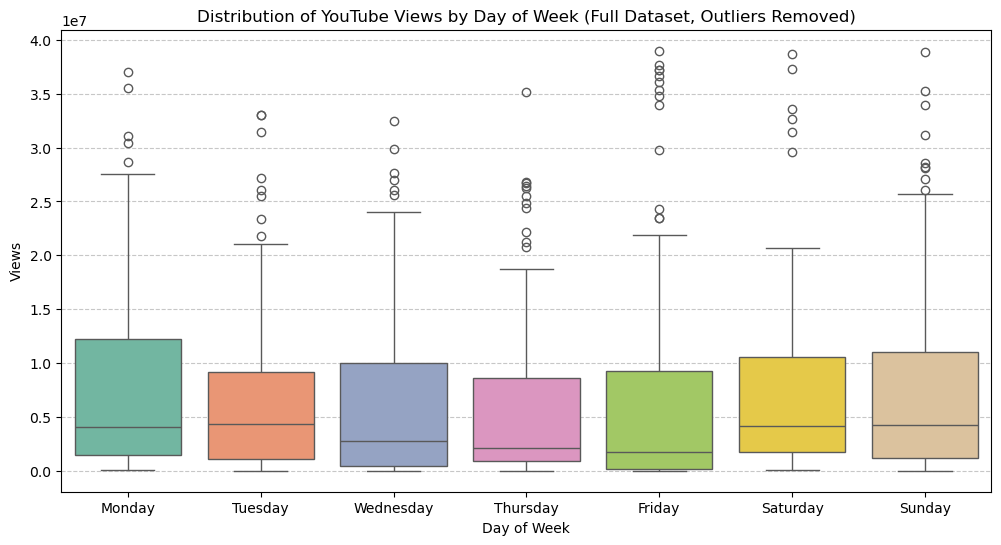

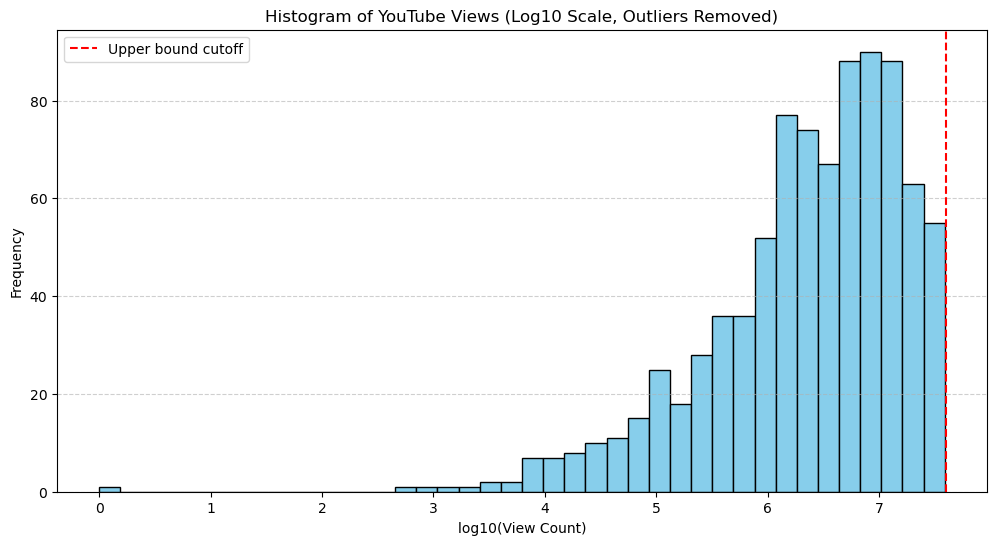

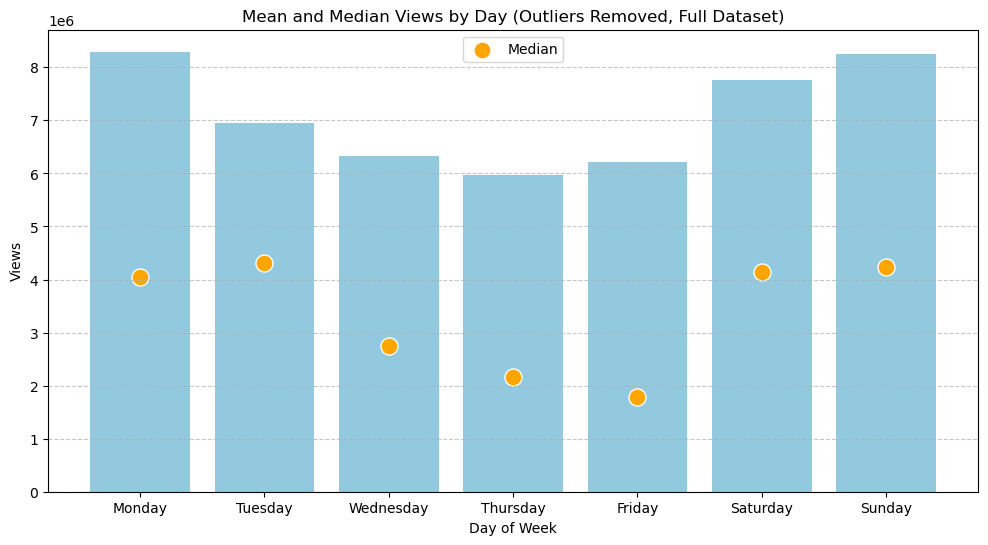


Percentiles of Views by Day of Week:
                  25th       50th         75th
day_of_week                                   
Monday       2024244.0  5797873.5  26091804.00
Tuesday      1272425.0  5517568.0  15446136.25
Wednesday     548357.0  4734859.0  14439432.00
Thursday      954789.0  3956913.0  15670347.50
Friday        282974.5  2819961.0  12322302.50
Saturday     2258463.5  7113981.0  19364865.25
Sunday       1460173.5  6514070.5  22786222.50

Coefficient of Variation per Day:
                   CV
day_of_week          
Monday       1.892076
Tuesday      3.739754
Wednesday    2.945769
Thursday     2.588283
Friday       2.607897
Saturday     4.458065
Sunday       2.098192

ANOVA Result: F = 1.69, p = 0.1207
Conclusion: No statistical evidence that publishing day affects views.

Total number of videos analyzed: 1000


In [5]:
# YouTube Views Analysis
# Step 1: Import libraries and suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import numpy as np

# Step 2: Set up YouTube API
API_KEY = " "  # Insert your API key
youtube = build('youtube', 'v3', developerKey=API_KEY)

# Step 3: Function to collect YouTube videos
def get_videos(query, max_results=250):
    videos = []
    nextPageToken = None
    collected = 0
    
    while collected < max_results:
        request = youtube.search().list(
            part="snippet",
            q=query,
            type="video",
            maxResults=min(50, max_results - collected),
            pageToken=nextPageToken
        )
        response = request.execute()
        
        for item in response['items']:
            video_id = item['id']['videoId']
            title = item['snippet']['title']
            publish_date = item['snippet']['publishedAt']
            
            stats_request = youtube.videos().list(
                part="statistics",
                id=video_id
            )
            stats_response = stats_request.execute()
            stats_data = stats_response['items'][0]['statistics']
            views = int(stats_data.get('viewCount', 0))
            
            videos.append({
                'video_id': video_id,
                'title': title,
                'publish_date': publish_date,
                'views': views
            })
            collected += 1
            if collected >= max_results:
                break
        
        nextPageToken = response.get('nextPageToken')
        if not nextPageToken:
            break
            
    return videos

# Step 4: Collect 1,000 videos across multiple categories
queries = ['music', 'gaming', 'education', 'sports', 'comedy', 'technology', 'movies']
all_videos = []

target_videos = 1000
query_index = 0

while len(all_videos) < target_videos:
    q = queries[query_index % len(queries)]
    videos = get_videos(q, max_results=250)
    all_videos.extend(videos)
    print(f"Collected so far: {len(all_videos)} videos")
    query_index += 1

all_videos = all_videos[:target_videos]
print(f"Final total videos: {len(all_videos)}")

# Step 5: Convert to DataFrame
df = pd.DataFrame(all_videos)

# Step 6: Convert publish_date and extract day of week
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['day_of_week'] = df['publish_date'].dt.day_name()

# Step 7: Summary statistics before filtering
summary = df.groupby('day_of_week')['views'].agg(['count','mean','median','std','min','max']).reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
print("\nSummary Statistics by Day of Week:")
print(summary)

# Outlier Removal (Full Dataset IQR)

# Calculate IQR for the full dataset
Q1 = df['views'].quantile(0.25)
Q3 = df['views'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

# Filter dataset
df_filtered_full = df[(df['views'] >= lower_bound) & (df['views'] <= upper_bound)]

print(f"\nOutlier Removal - Full Dataset")
print(f"Lower bound: {lower_bound:.0f}, Upper bound: {upper_bound:.0f}")
print(f"Videos removed: {len(df) - len(df_filtered_full)}")
print(f"Videos remaining for visualization: {len(df_filtered_full)}")

# Visualizations

# Boxplot (full dataset, outliers removed)
plt.figure(figsize=(12,6))
sns.boxplot(
    x='day_of_week', y='views', data=df_filtered_full,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    palette="Set2"
)
plt.title('Distribution of YouTube Views by Day of Week (Full Dataset, Outliers Removed)')
plt.xlabel('Day of Week')
plt.ylabel('Views')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram (log scale)
plt.figure(figsize=(12,6))
plt.hist(np.log10(df_filtered_full['views'] + 1), bins=40, color='skyblue', edgecolor='black')  # +1 to avoid log(0)
plt.axvline(np.log10(upper_bound), color='red', linestyle='--', label='Upper bound cutoff')
plt.title('Histogram of YouTube Views (Log10 Scale, Outliers Removed)')
plt.xlabel('log10(View Count)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Barplot of mean and median by day (filtered for visualization)
stats_filtered = df_filtered_full.groupby('day_of_week')['views'].agg(['mean','median','count','std']).reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='day_of_week', y='mean', data=stats_filtered, color='skyblue')
sns.scatterplot(x='day_of_week', y='median', data=stats_filtered, color='orange', s=150, label='Median')
plt.title('Mean and Median Views by Day (Outliers Removed, Full Dataset)')
plt.xlabel('Day of Week')
plt.ylabel('Views')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Percentiles (original full dataset)

percentiles = df.groupby('day_of_week')['views'].quantile([0.25,0.5,0.75]).unstack().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
percentiles.columns = ['25th','50th','75th']
print("\nPercentiles of Views by Day of Week:")
print(percentiles)

# Coefficient of Variation

stats_df = df.groupby('day_of_week')['views'].agg(['mean','std']).reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
stats_df['CV'] = stats_df['std'] / stats_df['mean']
print("\nCoefficient of Variation per Day:")
print(stats_df[['CV']])

# ANOVA (full dataset)

groups = [df[df['day_of_week']==day]['views'] for day in ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
anova_result = stats.f_oneway(*groups)

print(f"\nANOVA Result: F = {anova_result.statistic:.2f}, p = {anova_result.pvalue:.4f}")
if anova_result.pvalue < 0.05:
    print("Conclusion: Publishing day affects view counts.")
else:
    print("Conclusion: No statistical evidence that publishing day affects views.")

# Total sample size
print(f"\nTotal number of videos analyzed: {len(df)}")


In [2]:
# Call info() here

## 📊 My Analysis

*Perform your analysis in the cell below. Please feel free to add more cells if you need them!*

In [3]:
# Perform your analysis here

## 🧠 My Answer

*Write your answer here.* <br>

*Remember to interpret the specific values that you found in your analysis. It may help to pretend like I have never heard of the population you are studying and have no idea how to interpret the analysis you performed.*

Analysis and Conclusion

This study investigated whether the day a YouTube video is published affects its view count. A random sample of 1,000 videos across multiple categories (Music, Gaming, Education, etc.) published in 2024 was analyzed. The independent variable was the day of the week, and the dependent variable was the number of views.

Descriptive Statistics

Mean views (from barplots):

Thursday: highest average ~27.2 million

Friday: lowest average ~17.5 million

Median views (from histograms and barplots on log scale):

Saturday: highest median ~7.1 million

Friday: lowest median ~2.8 million

Large differences between mean and median indicate that a few extremely viral videos inflate the average, while most videos receive far fewer views. Boxplots show long upper whiskers for some days, highlighting skewness.

Percentiles (from histograms and boxplots):

25th percentile (Q1): bottom edge of the box

50th percentile (median): middle line in the box; also shown as scatter points in barplots

75th percentile (Q3): top edge of the box

Percentile values by day:

Monday: 25th = 2,024,244; median = 5,797,874; 75th = 26,091,804

Tuesday: 25th = 1,272,425; median = 5,517,568; 75th = 15,446,136

Wednesday: 25th = 548,357; median = 4,734,859; 75th = 14,439,432

Thursday: 25th = 954,789; median = 3,956,913; 75th = 15,670,348

Friday: 25th = 282,975; median = 2,819,961; 75th = 12,322,303

Saturday: 25th = 2,258,464; median = 7,113,981; 75th = 19,364,865

Sunday: 25th = 1,460,174; median = 6,514,071; 75th = 22,786,223

These percentiles explain why distributions are skewed toward lower views, with a few extreme values stretching the range.

Outlier Analysis - Full Dataset

Outliers were removed from the full 1,000-video dataset using the IQR method for clear visualization:

IQR = Q3 - Q1 (full dataset)

Lower bound = 0 (views cannot be negative)

Upper bound = 39,697,583 views

Videos above upper bound: 136

Videos remaining for visualization: 864

Histogram cutoff explanation:

Videos above 39.7 million views were removed from histograms to focus on the main cluster of videos.

Extreme viral videos are excluded for clarity, while lower-view videos remain fully represented.

Histograms accurately show skew and spread without distortion.

No videos were removed from the lower end of the distribution because view counts cannot be negative, and low-view videos represent the majority of the dataset. Removing these would artificially truncate the distribution and distort the true pattern of typical view counts. Keeping them ensures that the histograms and boxplots accurately reflect the main cluster of videos, including moderate and low-view content, which is essential for understanding day-to-day patterns and overall variability. Only extreme high-view outliers were removed for visualization clarity, so the core dataset remains fully represented.

Variability

Coefficient of Variation (CV) per day:

Monday: 1.89

Tuesday: 3.74

Wednesday: 2.95

Thursday: 2.59

Friday: 2.61

Saturday: 4.46

Sunday: 2.10

High CV indicates wide variation even within a single day, consistent with skewed histograms and long boxplot whiskers.

Statistical Testing

One-way ANOVA: F = 1.69, p = 0.1207

Since p > 0.05, we fail to reject the null hypothesis: there is no statistical evidence that the day of the week significantly affects view counts.

Potential Bias and Confounding Factors

Video age: older videos accumulate more views.

Channel size and subscriber count: more popular channels get higher baseline views.

Content type, length, language, thumbnail quality, or viral trends could also influence views.

These factors may have a stronger effect on view counts than the day of publication.

Key Insights

Differences in mean or median views across days exist but are not statistically significant.

Removing extreme outliers clarifies visualization but does not affect statistical validity.

Viral videos, channel popularity, and content type are more influential than upload day.

Conclusion

The day a video is published does not meaningfully affect YouTube view counts.

Visualizations, descriptive statistics, and ANOVA confirm that observed differences are likely due to a few viral videos rather than a day-of-week effect.

Outlier removal improves visualization clarity but does not change the analysis results.

Visualizations Referenced

Boxplots: Show distribution, median, quartiles, and outliers (after IQR cutoff).

Histograms (log scale): Display skew and clustering; focus on main cluster of views.

Barplots: Show mean (bars) and median (scatter points) per day.